In [1]:
#standard DS imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

#sklearn imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, plot_confusion_matrix

#custom imports
import prepare
import acquire
import env

#filter out any noisy warning flags
import warnings
warnings.filterwarnings('ignore')


# Are customers with Fiber Optic more or less likely to churn?

In [2]:
# Acquire Step
df = acquire.get_telco_data()
# prepare and split the data
train, validate, test = prepare.prep_telco_data(df)

# drop object columns and create X_train of features only 
# and y_train of churn only. 
X_train = train.drop(columns=['churn_encoded', 'internet_service_type_Fiber optic', 'gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type'])
y_train = train.churn_encoded

X_validate = validate.drop(columns=['churn_encoded', 'internet_service_type_Fiber optic', 'gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type'])
y_validate = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded', 'internet_service_type_Fiber optic', 'gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type'])
y_test = test.churn_encoded

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((3937, 29), (1688, 29), (1407, 29))

In [3]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_

In [4]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1


In [5]:
train.churn_encoded.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

H_0: Customers with fiber optic are less likely to churn.

H_a: Customers with fiber optic are more likely to churn.

<AxesSubplot:xlabel='internet_service_type_Fiber optic', ylabel='count'>

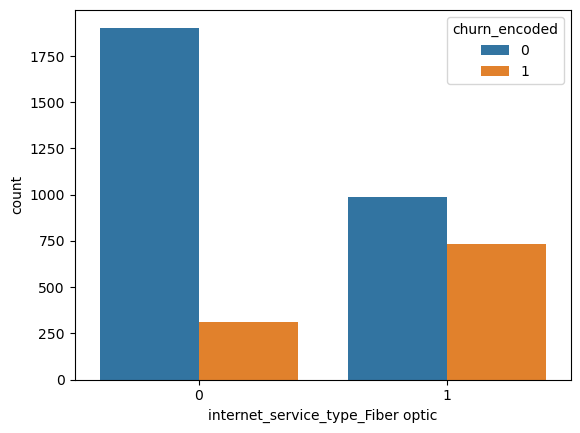

In [6]:
sns.countplot(data=train, x="internet_service_type_Fiber optic", hue="churn_encoded")

In [7]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "Customers with fiber optic are less likely to churn."
alternative_hypothesis = "Customers with fiber optic are more likely to churn."

# Setup a crosstab of observed churn to fiber optic
observed = pd.crosstab(train.churn_encoded, train['internet_service_type_Fiber optic'])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that Customers with fiber optic are less likely to churn.
Sufficient evidence to move forward understanding that Customers with fiber optic are more likely to churn.


2.831419548361709e-90

### Takeaway:

- It is more likely that customers who have fiber optic churned versus customers who did not have fiber optic.

# Does the type of contract (one year, two year, or month to month) affect if a customer churns?

H_0: There is no correlation between type of contract and if a customer churns.

H_a: There is a correlation between type of contract and if a customer churns.

<AxesSubplot:xlabel='contract_type', ylabel='count'>

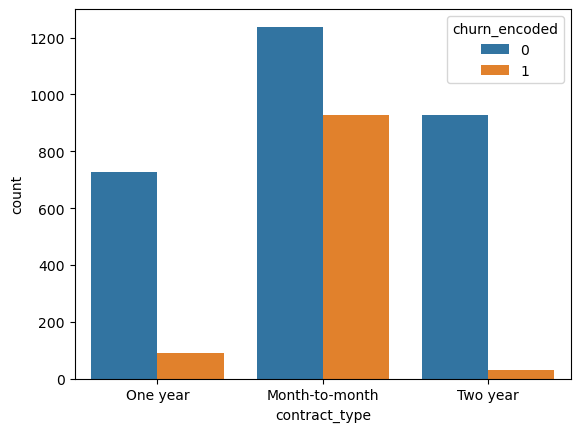

In [8]:
sns.countplot(data=train, x="contract_type", hue="churn_encoded")

In [9]:
monthly_train = (train['contract_type_One year'] == 0) & (train['contract_type_Two year'] == 0)
monthly_validate = (validate['contract_type_One year'] == 0) & (validate['contract_type_Two year'] == 0)
monthly_test = (test['contract_type_One year'] == 0) & (test['contract_type_Two year'] == 0)


In [10]:
# create a new column for month to month contracts for the train, validate, and test df

train = train.assign(monthly_contract = monthly_train)
train['monthly_encoded'] = train.monthly_contract.map({True: 1, False: 0})

validate = validate.assign(monthly_contract = monthly_validate)
validate['monthly_encoded'] = validate.monthly_contract.map({True: 1, False: 0})

test = test.assign(monthly_contract = monthly_test)
test['monthly_encoded'] = test.monthly_contract.map({True: 1, False: 0})

In [11]:
test.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,monthly_contract,monthly_encoded
3311,Female,0,No,No,29,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,0,1,False,0
6330,Male,0,Yes,Yes,36,Yes,Yes,No internet service,No internet service,No internet service,...,0,0,1,0,1,1,0,0,False,0
6156,Male,1,No,No,1,Yes,No,No,No,No,...,0,0,0,0,0,0,1,0,True,1
5313,Male,0,No,No,25,Yes,No,No,No,No,...,0,0,0,1,0,0,1,0,True,1
1176,Female,0,Yes,No,34,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,True,1


In [12]:

# Let's run a chi squared to compare proportions, to have more confidence
null_hypothesis = "There is no correlation between type of contract and if a customer churns"
alternative_hypothesis = "There is a correlation between type of contract and if a customer churns."

# Setup a crosstab of observed churn to fiber optic
observed = pd.crosstab(train.churn_encoded, monthly_train)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that There is no correlation between type of contract and if a customer churns
Sufficient evidence to move forward understanding that There is a correlation between type of contract and if a customer churns.


3.4484593947893894e-143

# Is there a service that is associated with more churn than expected?

<AxesSubplot:xlabel='phone_service', ylabel='count'>

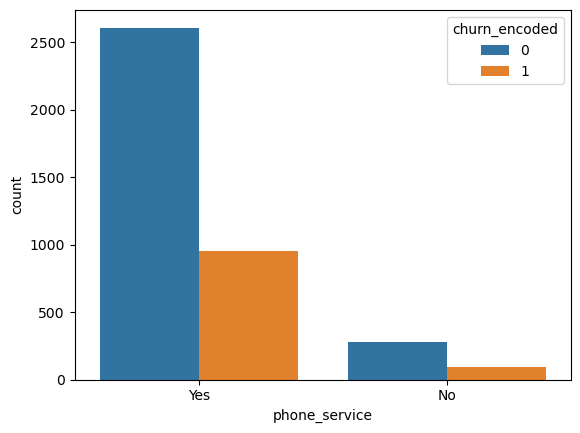

In [13]:
sns.countplot(data=train, x="phone_service", hue="churn_encoded")

<AxesSubplot:xlabel='multiple_lines', ylabel='count'>

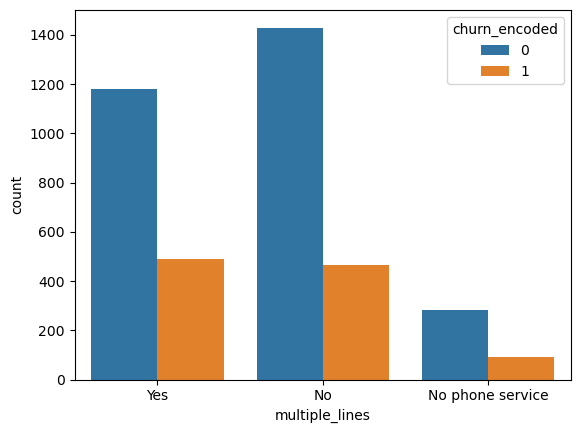

In [14]:
sns.countplot(data=train, x="multiple_lines", hue="churn_encoded")

<AxesSubplot:xlabel='online_security', ylabel='count'>

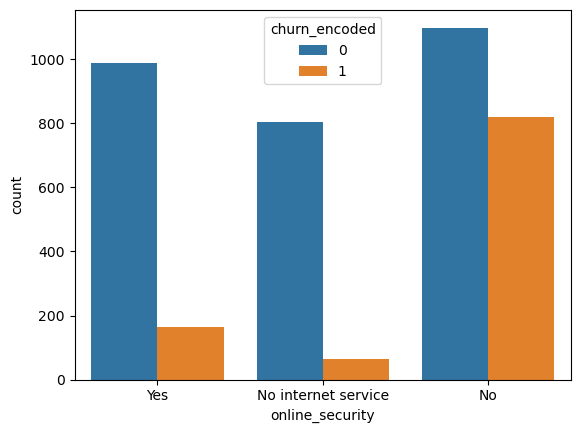

In [15]:
sns.countplot(data=train, x="online_security", hue="churn_encoded")

<AxesSubplot:xlabel='online_backup', ylabel='count'>

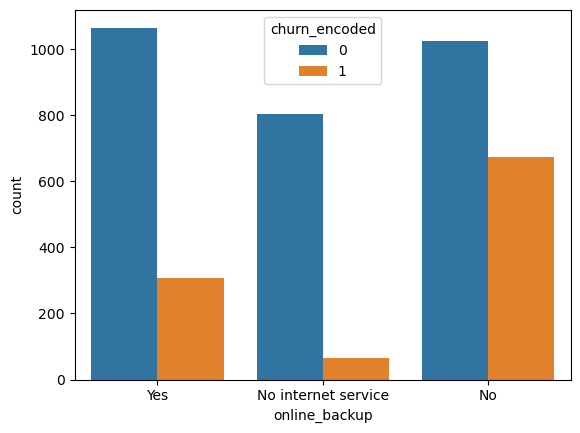

In [16]:
sns.countplot(data=train, x="online_backup", hue="churn_encoded")

<AxesSubplot:xlabel='device_protection', ylabel='count'>

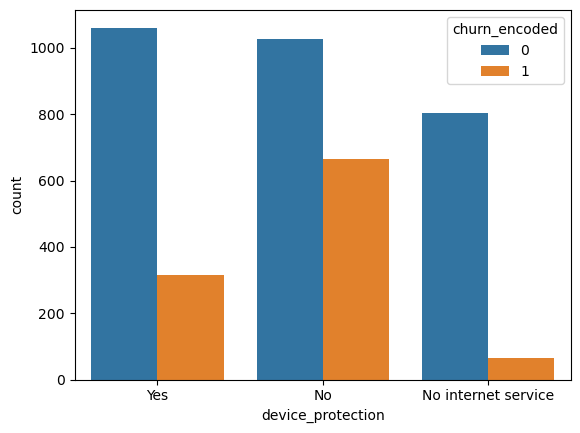

In [17]:
sns.countplot(data=train, x="device_protection", hue="churn_encoded")

<AxesSubplot:xlabel='tech_support', ylabel='count'>

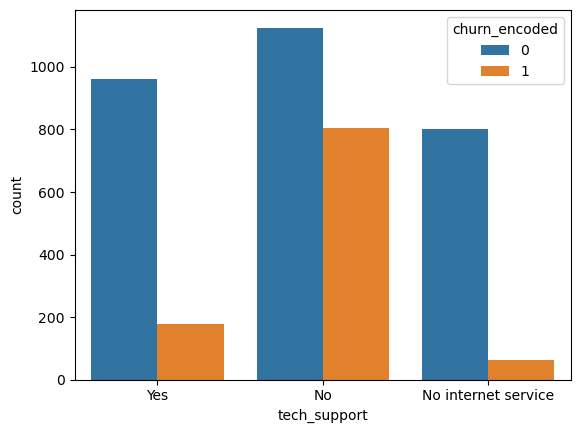

In [18]:
sns.countplot(data=train, x="tech_support", hue="churn_encoded")

<AxesSubplot:xlabel='streaming_tv', ylabel='count'>

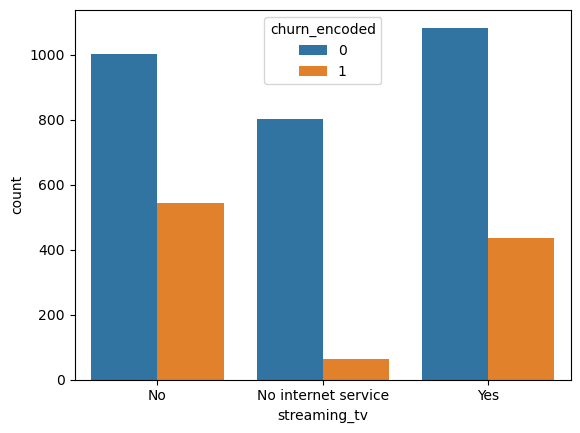

In [19]:
sns.countplot(data=train, x="streaming_tv", hue="churn_encoded")

<AxesSubplot:xlabel='streaming_movies', ylabel='count'>

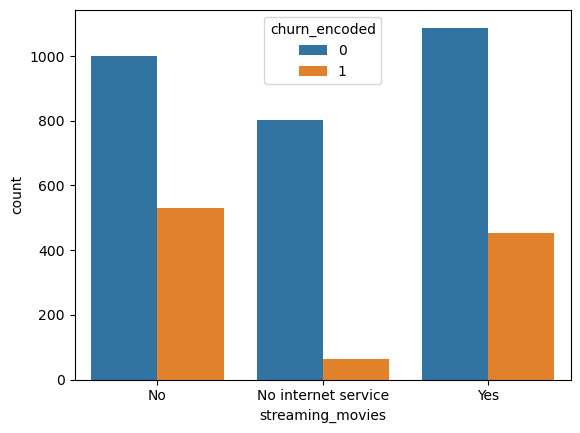

In [20]:
sns.countplot(data=train, x="streaming_movies", hue="churn_encoded")

### Takeaways:

- The major contributor for customer churn is more correlated with internet services that provide security such as tech support, device protection, online backup, and online security.

- Other services for entertainment purposes such as streaming tv and movies had less of an impact on customer churn.

In [21]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "Customers with online security are less likely to churn."
alternative_hypothesis = "Customers without online security are more likely to churn."

# Setup a crosstab of observed churn to fiber optic
observed = pd.crosstab(train.churn_encoded, train.online_security)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that Customers with online security are less likely to churn.
Sufficient evidence to move forward understanding that Customers without online security are more likely to churn.


1.3862996282206897e-111

# Do customers who churn have a higher average monthly spend than those who don't?

<AxesSubplot:xlabel='total_charges', ylabel='Count'>

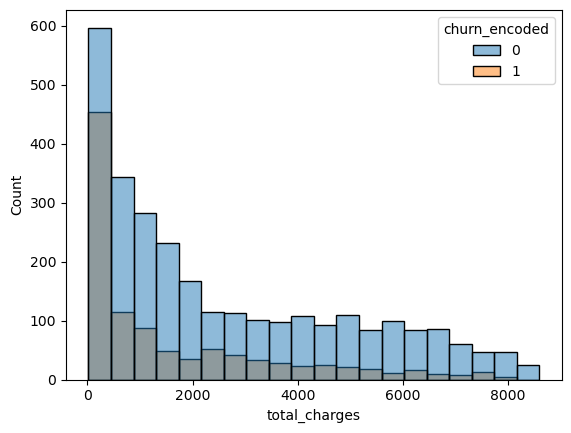

In [22]:
sns.histplot(data=train, x="total_charges", hue="churn_encoded")

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

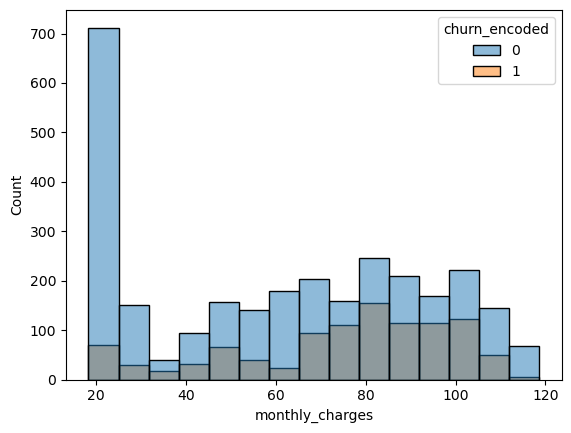

In [23]:
sns.histplot(data=train, x="monthly_charges", hue="churn_encoded")

### Takeaways:

- It would appear that the more money that was spent by the customer, the less likely they are to churn. 

- The large majority of those that churned spent $500 or less.

- Those customers who spent about $80 a month were the most likely to churn.

In [24]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "Customers who spend less than $500 in total charges are less likely to churn."
alternative_hypothesis = "Customers who spend less than $500 in total charges are more likely to churn."

# Setup a crosstab of observed churn to fiber optic
observed = pd.crosstab(train.churn_encoded, train.total_charges)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Fail to reject the null
Insufficient evidence to reject the null


0.605256775425444

In [25]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "There is no correlation between monthly charges and churn."
alternative_hypothesis = "There is a correlation between monthly charges and churn."

# Setup a crosstab of observed churn to fiber optic
observed = pd.crosstab(train.churn_encoded, train.monthly_charges)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that There is no correlation between monthly charges and churn.
Sufficient evidence to move forward understanding that There is a correlation between monthly charges and churn.


1.7696616579595508e-06

In [26]:
monthly_charges_80_train = (train['monthly_charges'] >= 80) 
monthly_charges_80_validate = (validate['monthly_charges'] >= 80) 
monthly_charges_80_test = (test['monthly_charges'] >= 80) 


In [27]:
# create a new column for monthly charges greater than $80 for the train, validate, and test df

train = train.assign(monthly_charges = monthly_charges_80_train)
train

train['monthly_charges_greater_than_80'] = train.monthly_charges.map({True: 1, False: 0})
train.head()

validate = validate.assign(monthly_charges = monthly_charges_80_validate)
validate['monthly_charges_greater_than_80'] = validate.monthly_charges.map({True: 1, False: 0})

test = test.assign(monthly_charges = monthly_charges_80_test)
test['monthly_charges_greater_than_80'] = test.monthly_charges.map({True: 1, False: 0})

In [28]:
validate.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,monthly_contract,monthly_encoded,monthly_charges_greater_than_80
816,Female,0,Yes,No,27,Yes,Yes,No,No,No,...,0,0,1,0,1,0,0,True,1,1
1488,Female,0,Yes,No,71,Yes,Yes,Yes,Yes,Yes,...,0,1,0,0,1,0,0,False,0,1
4796,Male,0,No,No,44,No,No phone service,Yes,No,Yes,...,1,0,0,0,0,1,0,False,0,0
3213,Female,0,Yes,Yes,27,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,1,False,0,0
5026,Male,0,Yes,Yes,62,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,1,0,0,False,0,0


In [29]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_

In [30]:
testing_churn = ['online_security_Yes', 'internet_service_type_Fiber optic', 'monthly_encoded', 'monthly_charges_greater_than_80']

In [31]:
train[testing_churn]


,online_security_Yes,internet_service_type_Fiber optic,monthly_encoded,monthly_charges_greater_than_80
5919,1,0,0,0
1915,1,1,0,1
5054,0,0,1,0
2355,0,0,1,0
6279,1,0,0,0
...,...,...,...,...
394,0,1,1,1
3763,1,1,1,1
3444,0,0,0,0
1002,0,1,1,1


In [32]:
# drop all columns except for the target inputs: fiber optic, month to month contracts, 
# online security, and monthly charges.
# drop object columns and create X_train of features only 
# and y_train of churn only. 
X_train = train[testing_churn]
y_train = train.churn_encoded

X_validate = validate[testing_churn]
y_validate = validate.churn_encoded

X_test = test[testing_churn]
y_test = test.churn_encoded

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((3937, 4), (1688, 4), (1407, 4))

In [33]:
# Start with the baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [34]:
#create the model with desired depth
churn_tree1 = DecisionTreeClassifier(max_depth=5, random_state=123)


In [35]:
#fit the model
churn_tree1 = churn_tree1.fit(X_train, y_train)


In [36]:
# Use the model
# Evaluate the model's performance on train first
y_predictions = churn_tree1.predict(X_train)

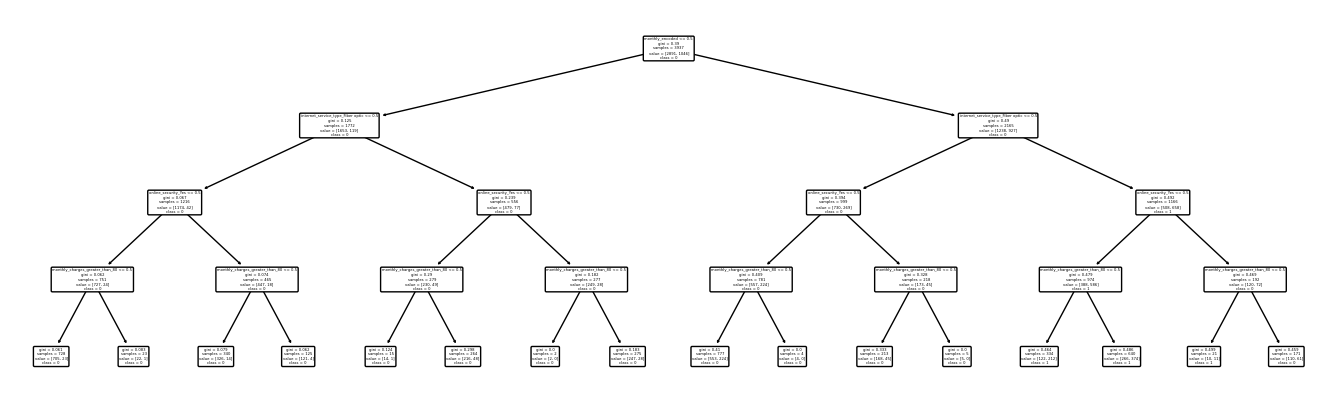

In [37]:
#visualize
plt.figure(figsize=(17, 5))
plot_tree(churn_tree1, feature_names=X_train.columns, 
class_names = np.array(churn_tree1.classes_).astype('str').tolist(), rounded=True)
plt.show()

In [38]:
#Use it
accuracy = churn_tree1.score(X_train, y_train)
print(f'Model 1 accuracy: {accuracy:.2%}')

Model 1 accuracy: 78.49%


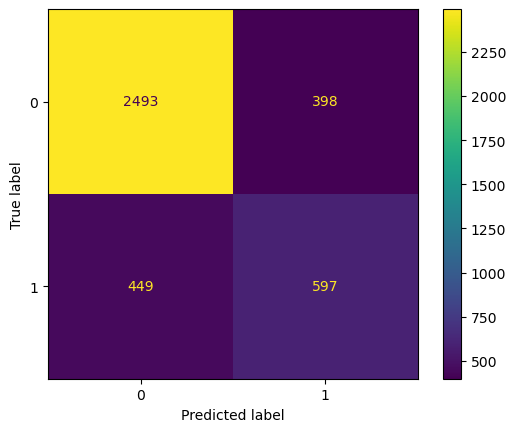

In [39]:
plot_confusion_matrix(churn_tree1, X_train, y_train)

In [40]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2891
           1       0.60      0.57      0.59      1046

    accuracy                           0.78      3937
   macro avg       0.72      0.72      0.72      3937
weighted avg       0.78      0.78      0.78      3937



In [41]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report).T

Tree of 3 depth


,precision,recall,f1-score,support
0,0.847383,0.862331,0.854792,2891.000000
1,0.600000,0.570746,0.585007,1046.000000
accuracy,0.784862,0.784862,0.784862,0.784862
macro avg,0.723691,0.716539,0.719900,3937.000000
weighted avg,0.781657,0.784862,0.783114,3937.000000


### Takeaways:

- With an accuracy of 78.46%, our Model 1 (max_depth = 3) performed better than our baseline accuracy of 73%
- Next step is to make a loop to test different max depths.

In [42]:
X_test

,online_security_Yes,internet_service_type_Fiber optic,monthly_encoded,monthly_charges_greater_than_80
3311,0,0,0,0
6330,0,0,0,0
6156,0,0,1,0
5313,0,1,1,0
1176,0,0,1,0
...,...,...,...,...
600,1,1,0,1
3946,0,0,1,0
3230,0,0,1,0
349,0,0,1,0


In [43]:
#Use the thing

metrics = []

for i in range(1, 5):
    # Make the model
    churn_trees = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    churn_trees = churn_trees.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = churn_trees.score(X_train, y_train)
    
    out_of_sample_accuracy = churn_trees.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.772416,0.738744,0.033671
2,3,0.784608,0.755332,0.029276
3,4,0.784862,0.752370,0.032492


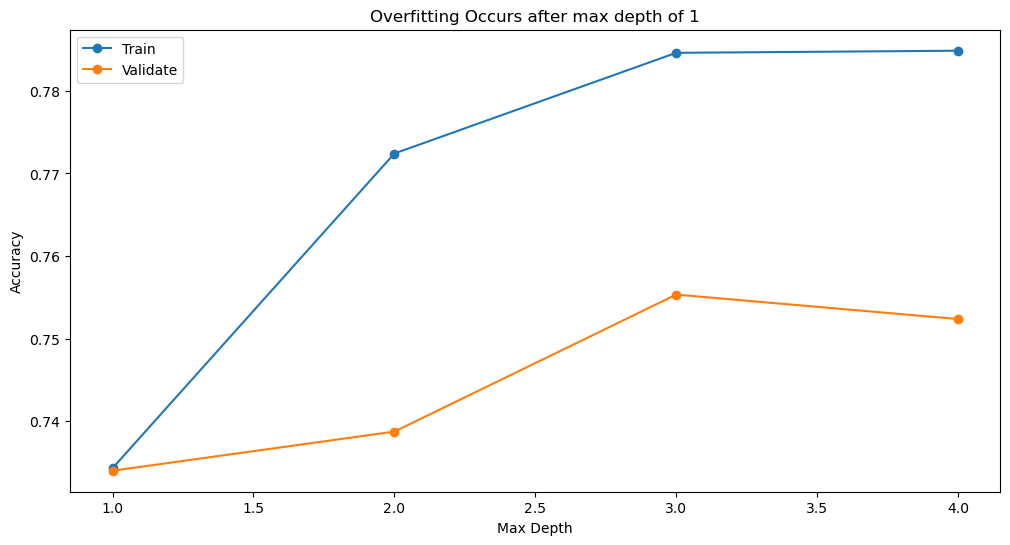

In [44]:
#Let's visualize this
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs after max depth of 1')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.784608,0.755332,0.029276
3,4,0.784862,0.752370,0.032492
1,2,0.772416,0.738744,0.033671
0,1,0.734315,0.734005,0.000311


### Takeaways:

- It looks like max_depth of 1 is our best option

In [46]:
seed = 42
rf = RandomForestClassifier(max_depth=4, random_state=42, min_samples_leaf=1)


In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [48]:
y_pred = rf.predict(X_train)

In [49]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.78


In [50]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2891
           1       0.60      0.57      0.59      1046

    accuracy                           0.78      3937
   macro avg       0.72      0.72      0.72      3937
weighted avg       0.78      0.78      0.78      3937



In [51]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.75


In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)

In [53]:
# model score
accuracy_train = knn.score(X_train, y_train)
accuracy_validate = knn.score(X_validate, y_validate)
accuracy_train, accuracy_validate

(0.7721615443230887, 0.7417061611374408)

In [54]:
# confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
Actual 0,2393,498
Actual 1,399,647


In [55]:
# classification report
pd.DataFrame(classification_report(y_train, 
                                   y_train_pred, 
                                   output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.857092,0.565066,0.772162,0.711079,0.779505
recall,0.827741,0.618547,0.772162,0.723144,0.772162
f1-score,0.842161,0.590598,0.772162,0.716379,0.775324
support,2891.000000,1046.000000,0.772162,3937.000000,3937.000000


In [56]:
# create algorithm object
logit1 = LogisticRegression(C=1, 
                           random_state=123, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# fit model with age, pclass and fare as only features
logit1.fit(X_train, y_train)

# compute accuracy
train_accuracy = logit1.score(X_train, 
                             y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.7846075692151384
Baseline Accuracy: 0.7343154686309372


In [60]:
# Evaluate the model's performance on test data
y_predictions_test = churn_tree1.predict(X_test)
y_pred_proba = logit6.y_predictions_test(X_test)

#Use the model, compute the accuracy, and print the accuracy for test
accuracy_test = churn_tree1.score(X_test, y_test)
print(f'Accuracy of Decision Tree on test data is: {accuracy_test}')

Accuracy of Decision Tree on test data is: 0.7697228144989339


In [71]:
y_test

3311    0
6330    0
6156    0
5313    0
1176    0
       ..
600     1
3946    0
3230    1
349     0
3690    0
Name: churn_encoded, Length: 1407, dtype: int64

In [83]:
y_pred_proba = churn_tree1.predict_proba(X_test)
# select the 2nd item in the array to get prob of survival (1)

y_pred_proba = np.array([i[1] for i in y_pred_proba])

test_results = pd.DataFrame({'probability': y_pred_proba, 
                             'prediction': y_predictions_test,
                             })
test_results

,probability,prediction
0,0.031593,0
1,0.031593,0
2,0.288288,0
3,0.634731,1
4,0.288288,0
...,...,...
1402,0.101818,0
1403,0.288288,0
1404,0.288288,0
1405,0.288288,0


In [84]:


res = pd.DataFrame(test_results)
res.index = X_test.index # its important for comparison
res.columns = ["probability of churn", "prediction of churn"]


In [85]:
res.to_csv("prediction_results.csv")